# Final Project

# San Francisco Crime Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import zscore
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn import metrics
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
c:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type

In [4]:
#Get training data
new = pd.read_csv('final_result_sorted.csv')

In [5]:
print("new:{}".format(new.shape))

new:(897892, 17)


In [6]:
new.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent
0,2004-11-08 12:00:00,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Monday,SOUTHERN,NONE,200 Block of I-80,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
1,2004-10-28 09:05:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Thursday,SOUTHERN,NONE,200 Block of I-80,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
2,2004-10-25 18:00:00,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Monday,SOUTHERN,NONE,200 Block of I-80,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
3,2004-10-25 08:30:00,NON-CRIMINAL,LOST PROPERTY,Monday,SOUTHERN,NONE,200 Block of I-80,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
4,2004-10-15 10:45:00,OTHER OFFENSES,TRAFFIC VIOLATION,Friday,SOUTHERN,"ARREST, CITED",200 Block of I-80,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074


In [7]:
#Searching for null values in training data
new=pd.read_csv('final_result_sorted.csv', na_values=['-','?'])
new[new.isnull().any(axis=1)]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent


We are removing the features descript and resolution because they are known after the crime had occured and they doesn't really help in categorizing the crime. We are also removing address field because the X and Y values exactly tells about the crime spot and no need of the address. 

In [8]:
new.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent
0,2004-11-08 12:00:00,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Monday,SOUTHERN,NONE,200 Block of I-80,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
1,2004-10-28 09:05:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Thursday,SOUTHERN,NONE,200 Block of I-80,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
2,2004-10-25 18:00:00,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Monday,SOUTHERN,NONE,200 Block of I-80,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
3,2004-10-25 08:30:00,NON-CRIMINAL,LOST PROPERTY,Monday,SOUTHERN,NONE,200 Block of I-80,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
4,2004-10-15 10:45:00,OTHER OFFENSES,TRAFFIC VIOLATION,Friday,SOUTHERN,"ARREST, CITED",200 Block of I-80,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074


In [9]:
#Removing Descript, Resolution and Address fields from train
new.drop(['Descript','Resolution','Address'], axis=1, inplace=True)

In [10]:
new.head()

,Dates,Category,DayOfWeek,PdDistrict,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent
0,2004-11-08 12:00:00,LARCENY/THEFT,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
1,2004-10-28 09:05:00,SUSPICIOUS OCC,Thursday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
2,2004-10-25 18:00:00,OTHER OFFENSES,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
3,2004-10-25 08:30:00,NON-CRIMINAL,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074
4,2004-10-15 10:45:00,OTHER OFFENSES,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074


In [11]:
cat_list=new.Category.unique().tolist()
cat_list
#print("Categories:{}".format(cat_list))

['LARCENY/THEFT',
 'SUSPICIOUS OCC',
 'OTHER OFFENSES',
 'NON-CRIMINAL',
 'BURGLARY',
 'FRAUD',
 'WARRANTS',
 'ROBBERY',
 'SECONDARY CODES',
 'ASSAULT',
 'VANDALISM',
 'VEHICLE THEFT',
 'DRUNKENNESS',
 'MISSING PERSON',
 'ARSON',
 'RUNAWAY',
 'TRESPASS',
 'FORGERY/COUNTERFEITING',
 'SUICIDE',
 'SEX OFFENSES FORCIBLE',
 'FAMILY OFFENSES',
 'DRUG/NARCOTIC',
 'LIQUOR LAWS',
 'PROSTITUTION',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'STOLEN PROPERTY',
 'WEAPON LAWS',
 'KIDNAPPING',
 'RECOVERED VEHICLE',
 'BRIBERY',
 'BAD CHECKS',
 'EXTORTION',
 'EMBEZZLEMENT',
 'LOITERING',
 'SEX OFFENSES NON FORCIBLE',
 'GAMBLING',
 'TREA',
 'PORNOGRAPHY/OBSCENE MAT']

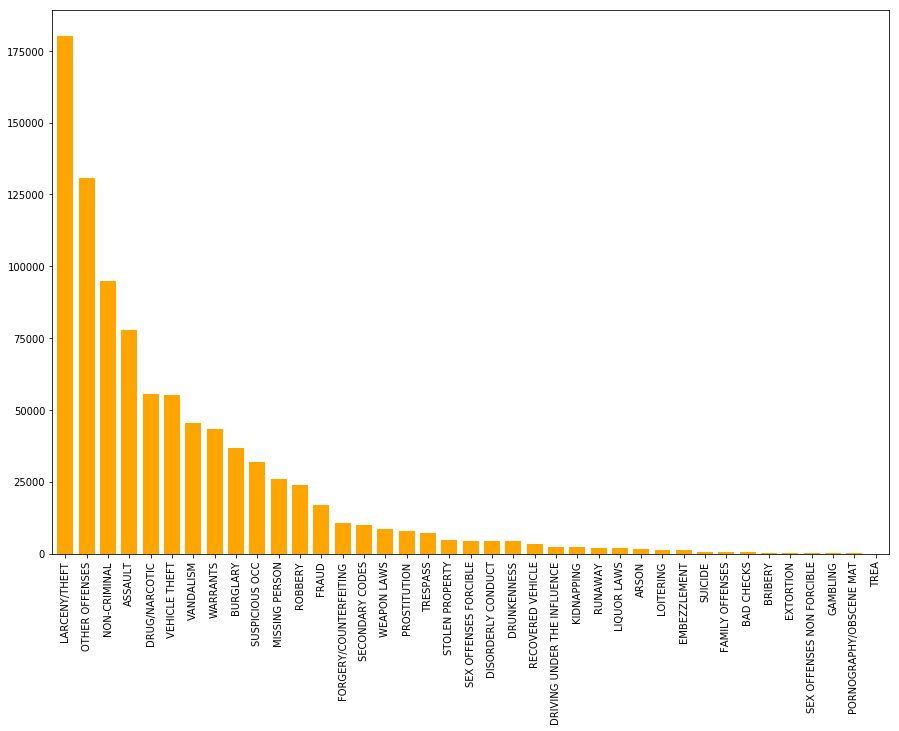

In [12]:
new['Category'].value_counts().plot(kind='bar',width=0.75,figsize=(15,10),color='orange')

In [13]:
#Function to convert each crime category to either White collar crime or Blue Collar crime
def White_OR_Blue(s):
    if (s['Category']=='WARRANTS') or (s['Category'] == 'NON-CRIMINAL') or (s['Category']=='FORGERY/COUNTERFEITING') or (s['Category']=='FRAUD') or (s['Category']=='BRIBERY') or (s['Category']=='EMBEZZLEMENT') or (s['Category']=='EXTORTION') or (s['Category']=='GAMBLING') or (s['Category']=='BAD CHECKS') or (s['Category']=='OTHER OFFENSES'):
        return int(1)
    elif (s['Category']=='LARCENY/THEFT') or (s['Category']=='VEHICLE THEFT') or (s['Category']=='VANDALISM') or (s['Category']=='ROBBERY') or (s['Category']=='ASSAULT') or (s['Category']=='WEAPON LAWS') or (s['Category']=='BURGLARY') or (s['Category']=='SUSPICIOUS OCC') or (s['Category']=='DRUNKENNESS') or (s['Category']=='DRUG/NARCOTIC') or (s['Category']=='STOLEN PROPERTY') or (s['Category']=='SECONDARY CODES') or (s['Category']=='TRESPASS') or (s['Category']=='MISSING PERSON') or (s['Category']=='KIDNAPPING') or (s['Category']=='RUNAWAY') or (s['Category']=='DRIVING UNDER THE INFLUENCE') or (s['Category']=='SEX OFFENSES FORCIBLE') or (s['Category']=='PROSTITUTION') or (s['Category']=='DISORDERLY CONDUCT') or (s['Category']=='ARSON') or (s['Category']=='FAMILY OFFENSES') or (s['Category']=='LIQUOR LAWS') or (s['Category']=='SUICIDE') or (s['Category']=='LOITERING') or (s['Category']=='SEX OFFENSES NON FORCIBLE') or (s['Category']=='TREA') or (s['Category']=='RECOVERED VEHICLE') or (s['Category']=='PORNOGRAPHY/OBSCENE MAT'):
        return int(0)

In [14]:
new['New Category'] = new.apply(White_OR_Blue, axis=1)

In [15]:
new

,Dates,Category,DayOfWeek,PdDistrict,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,New Category
0,2004-11-08 12:00:00,LARCENY/THEFT,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0
1,2004-10-28 09:05:00,SUSPICIOUS OCC,Thursday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0
2,2004-10-25 18:00:00,OTHER OFFENSES,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1
3,2004-10-25 08:30:00,NON-CRIMINAL,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1
4,2004-10-15 10:45:00,OTHER OFFENSES,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1
5,2004-10-15 10:30:00,OTHER OFFENSES,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1
6,2004-10-15 09:29:00,OTHER OFFENSES,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1
7,2004-10-15 09:24:00,OTHER OFFENSES,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1
8,2004-10-15 08:45:00,OTHER OFFENSES,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1
9,2004-10-15 07:50:00,OTHER OFFENSES,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1


In [16]:
new[new.isnull().any(axis=1)]

,Dates,Category,DayOfWeek,PdDistrict,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,New Category


In [17]:
for obj in new['New Category']:
    obj =int(round(obj))

In [18]:
new.head()


,Dates,Category,DayOfWeek,PdDistrict,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,New Category
0,2004-11-08 12:00:00,LARCENY/THEFT,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0
1,2004-10-28 09:05:00,SUSPICIOUS OCC,Thursday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0
2,2004-10-25 18:00:00,OTHER OFFENSES,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1
3,2004-10-25 08:30:00,NON-CRIMINAL,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1
4,2004-10-15 10:45:00,OTHER OFFENSES,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1


In [20]:
print("new:{}".format(new.shape))

new:(897892, 15)


In [21]:
#Removing Category values
new.drop(['Category'], axis=1, inplace=True)

In [22]:
new.head()

,Dates,DayOfWeek,PdDistrict,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,New Category
0,2004-11-08 12:00:00,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0
1,2004-10-28 09:05:00,Thursday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0
2,2004-10-25 18:00:00,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1
3,2004-10-25 08:30:00,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1
4,2004-10-15 10:45:00,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1


In [23]:
#Converting Dates filed to pandas datetime
new.Dates = new.Dates.apply(pd.to_datetime)

In [24]:
#Splitting Dates field to year, month, day, hour
new['Year'] = new.Dates.dt.year
new['Month'] = new.Dates.dt.month
new['Day'] = new.Dates.dt.day
new['Hour'] = new.Dates.dt.hour

In [25]:
new.head()

,Dates,DayOfWeek,PdDistrict,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,New Category,Year,Month,Day,Hour
0,2004-11-08 12:00:00,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0,2004,11,8,12
1,2004-10-28 09:05:00,Thursday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0,2004,10,28,9
2,2004-10-25 18:00:00,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1,2004,10,25,18
3,2004-10-25 08:30:00,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1,2004,10,25,8
4,2004-10-15 10:45:00,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1,2004,10,15,10


In [26]:
new.drop('Dates', axis=1, inplace=True)

In [27]:
new.head()

,DayOfWeek,PdDistrict,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,New Category,Year,Month,Day,Hour
0,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0,2004,11,8,12
1,Thursday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0,2004,10,28,9
2,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1,2004,10,25,18
3,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1,2004,10,25,8
4,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1,2004,10,15,10


# DATA VISUALIZATION

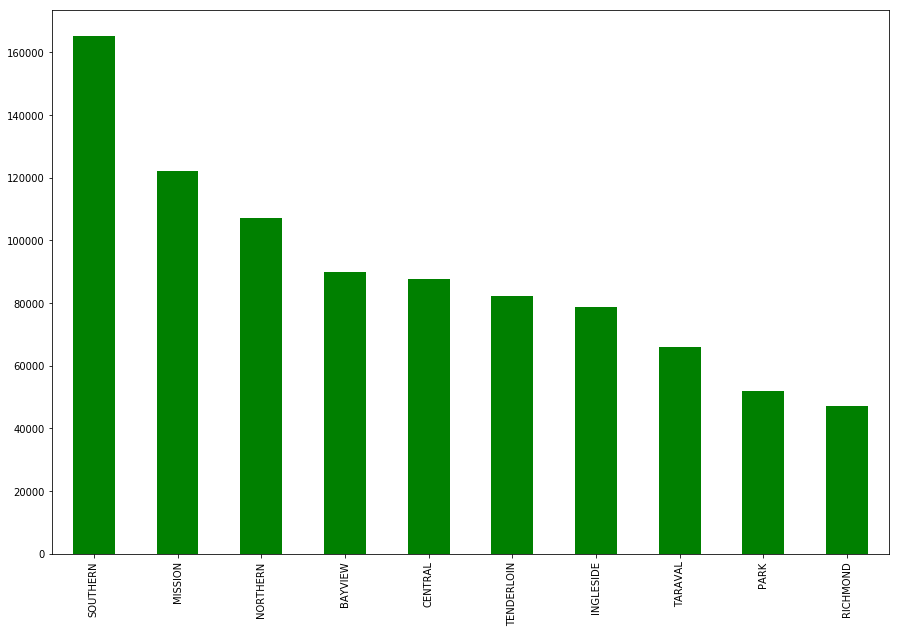

In [28]:
new['PdDistrict'].value_counts().plot(kind='bar',width=0.5,figsize=(15,10),color='Green')

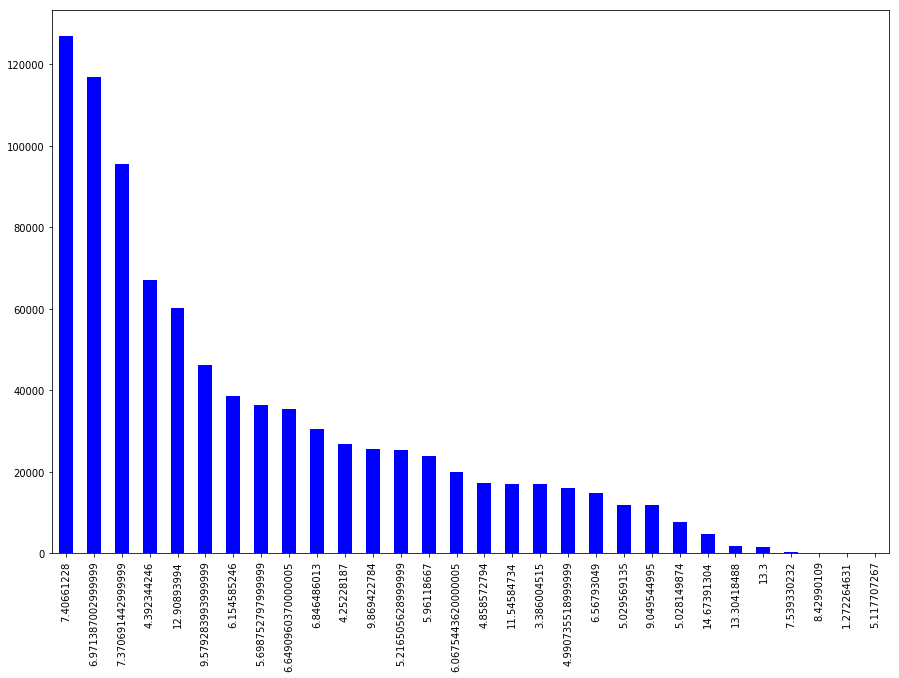

In [29]:
new['UnEmployment_Percent'].value_counts().plot(kind='bar',width=0.5,figsize=(15,10),color='Blue')


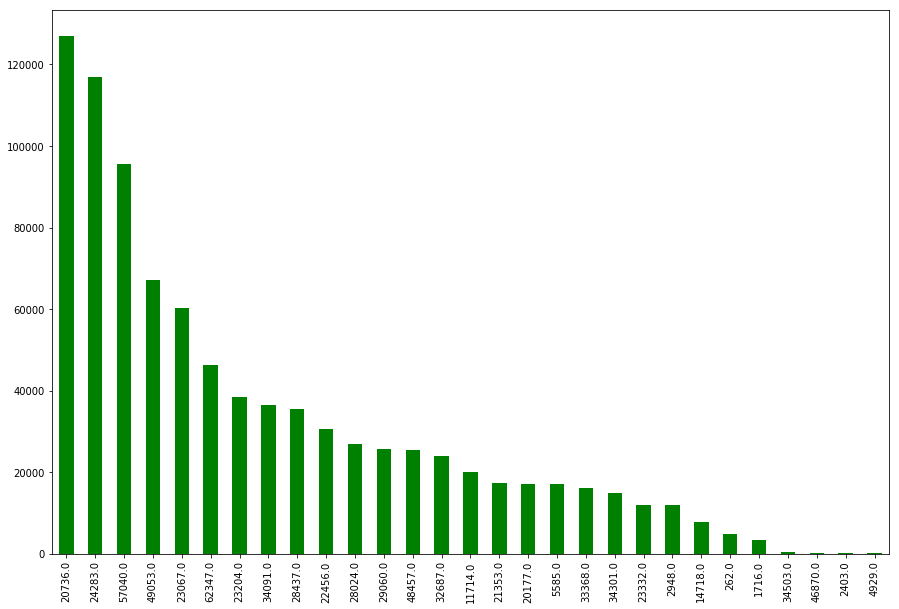

In [30]:
new['Mean_Family_Income'].value_counts().plot(kind='bar',width=0.5,figsize=(15,10),color='Green')


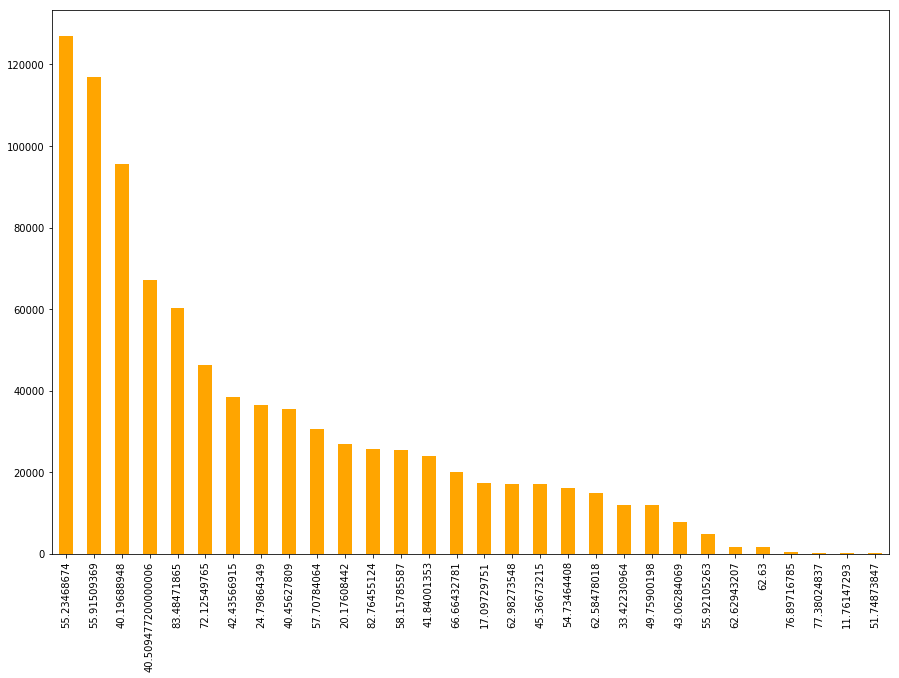

In [31]:
new['Percent_of_Minorities'].value_counts().plot(kind='bar',width=0.5,figsize=(15,10),color='orange')


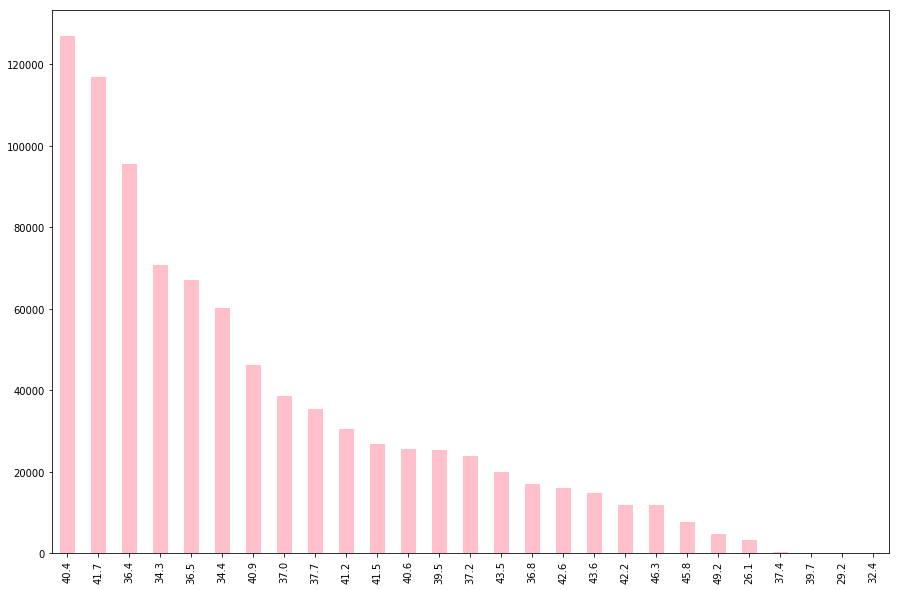

In [32]:
new['Median_Age'].value_counts().plot(kind='bar',width=0.5,figsize=(15,10),color='pink')


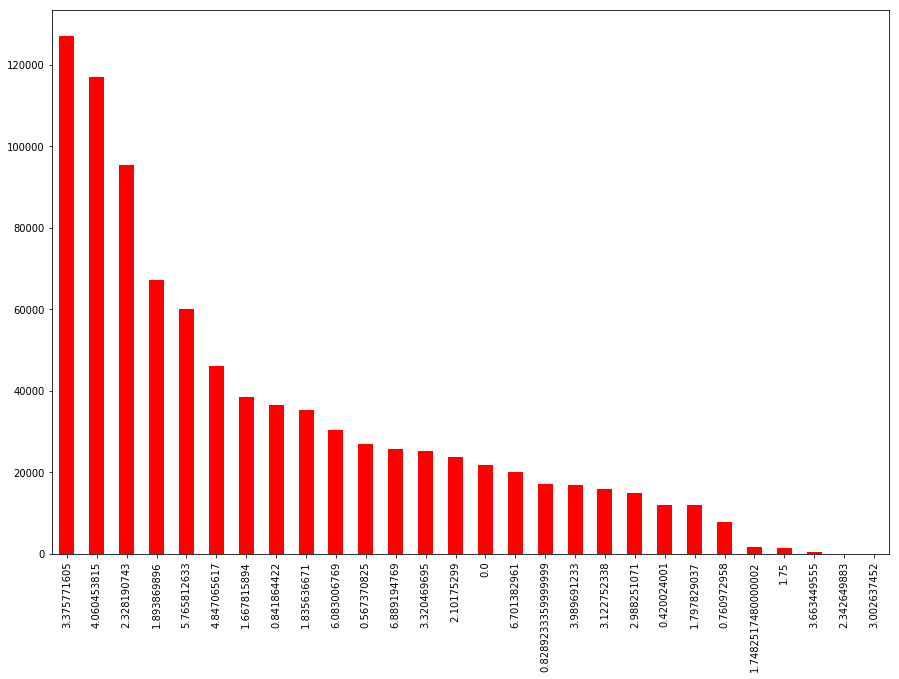

In [33]:
new['Uneducated_Percent'].value_counts().plot(kind='bar',width=0.5,figsize=(15,10),color='red')

In [34]:
Crimes_date =new['DayOfWeek'].value_counts()
Crimes_date

Friday       136637
Wednesday    132101
Saturday     129855
Thursday     127878
Tuesday      127720
Monday       124153
Sunday       119548
Name: DayOfWeek, dtype: int64

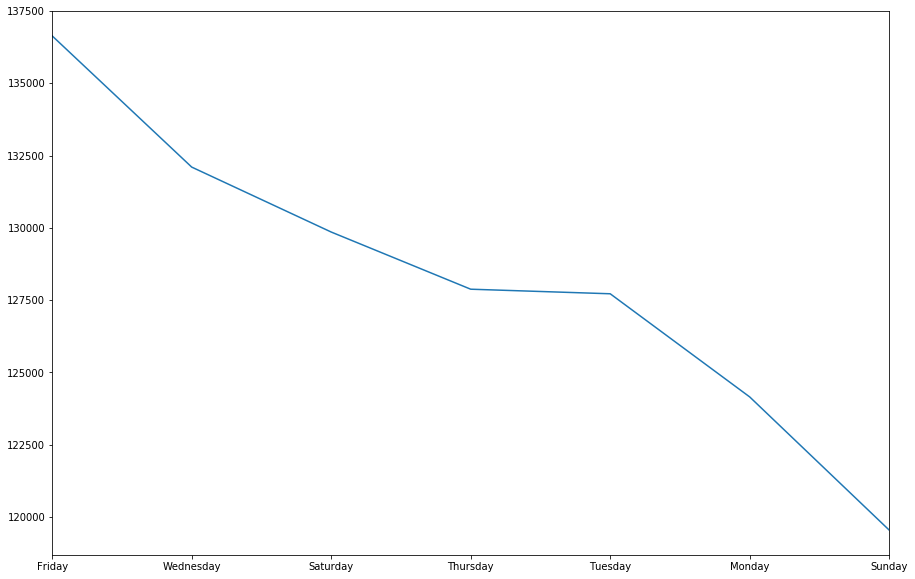

In [35]:
new['DayOfWeek'].value_counts().plot(figsize=(15,10))

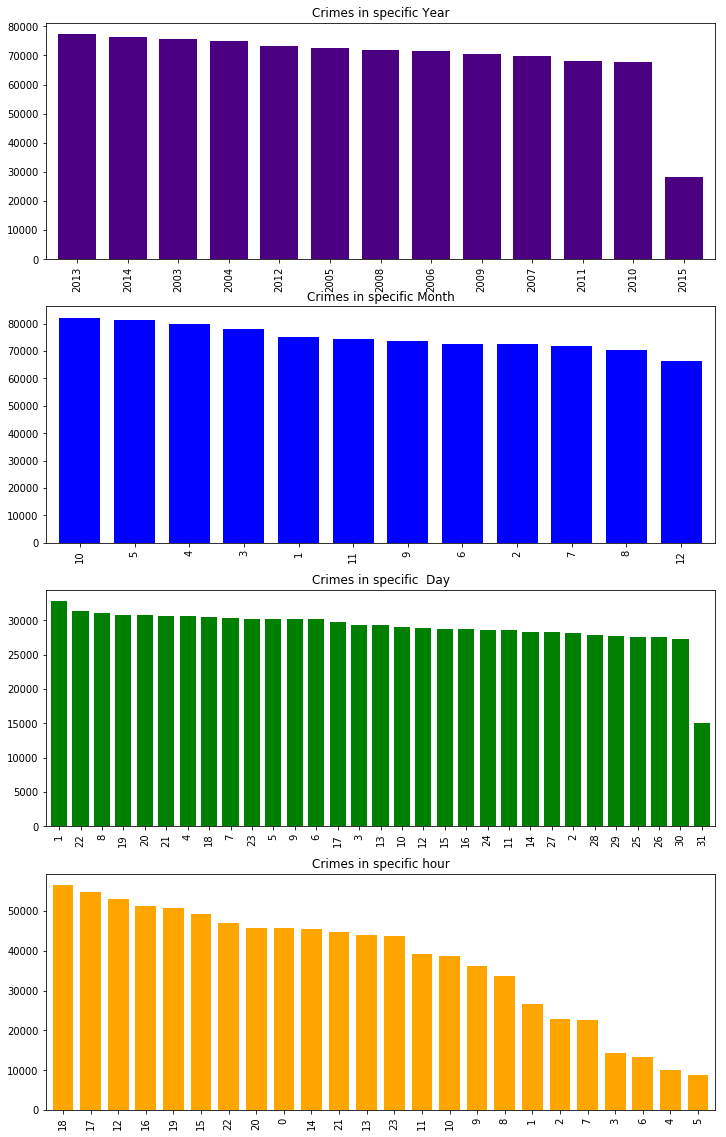

In [36]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, sharex=False)

new['Year'].value_counts().plot(kind='bar',title = 'Crimes in specific Year',width=0.75,figsize=(12,20),color='Indigo',ax=ax1)

new['Month'].value_counts().plot(kind='bar',title='Crimes in specific Month',width=0.75,figsize=(12,20),color='Blue',ax=ax2)

new['Day'].value_counts().plot(kind='bar',title = 'Crimes in specific  Day',width=0.75,figsize=(12,20),color='Green',ax=ax3)

new['Hour'].value_counts().plot(kind='bar',title='Crimes in specific hour',width=0.75,figsize=(12,20),color='Orange',ax=ax4)


#df.profit.plot(ax=ax1
#df.revenue.plot(kind='bar', ax=ax2)

In [37]:
new.head()

,DayOfWeek,PdDistrict,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,New Category,Year,Month,Day,Hour
0,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0,2004,11,8,12
1,Thursday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,0,2004,10,28,9
2,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1,2004,10,25,18
3,Monday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1,2004,10,25,8
4,Friday,SOUTHERN,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,1,2004,10,15,10


In [38]:
#One-hot encoding categorical values in testing data
new=pd.get_dummies(new, columns=['DayOfWeek','PdDistrict'])
new.head()

,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
1,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
2,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
3,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
4,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0


In [39]:
new.shape

(897892, 32)

In [55]:
#normalization
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

new['Longitude'] = zscore(new['Longitude'])
new['Latitude'] = zscore(new['Latitude'])
new['Population'] = zscore(new['Population'])
new['UnEmployment_Percent'] = zscore(new['UnEmployment_Percent'])
new['Mean_Family_Income'] = zscore(new['Mean_Family_Income'])

In [56]:
new['Percent_of_Minorities'] = zscore(new['Percent_of_Minorities'])
new['Median_Age'] = zscore(new['Median_Age'])
new['Uneducated_Percent'] = zscore(new['Uneducated_Percent'])
new['Poverty_Percent'] = zscore(new['Poverty_Percent'])

In [40]:
new.head()

,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
1,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
2,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
3,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
4,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0


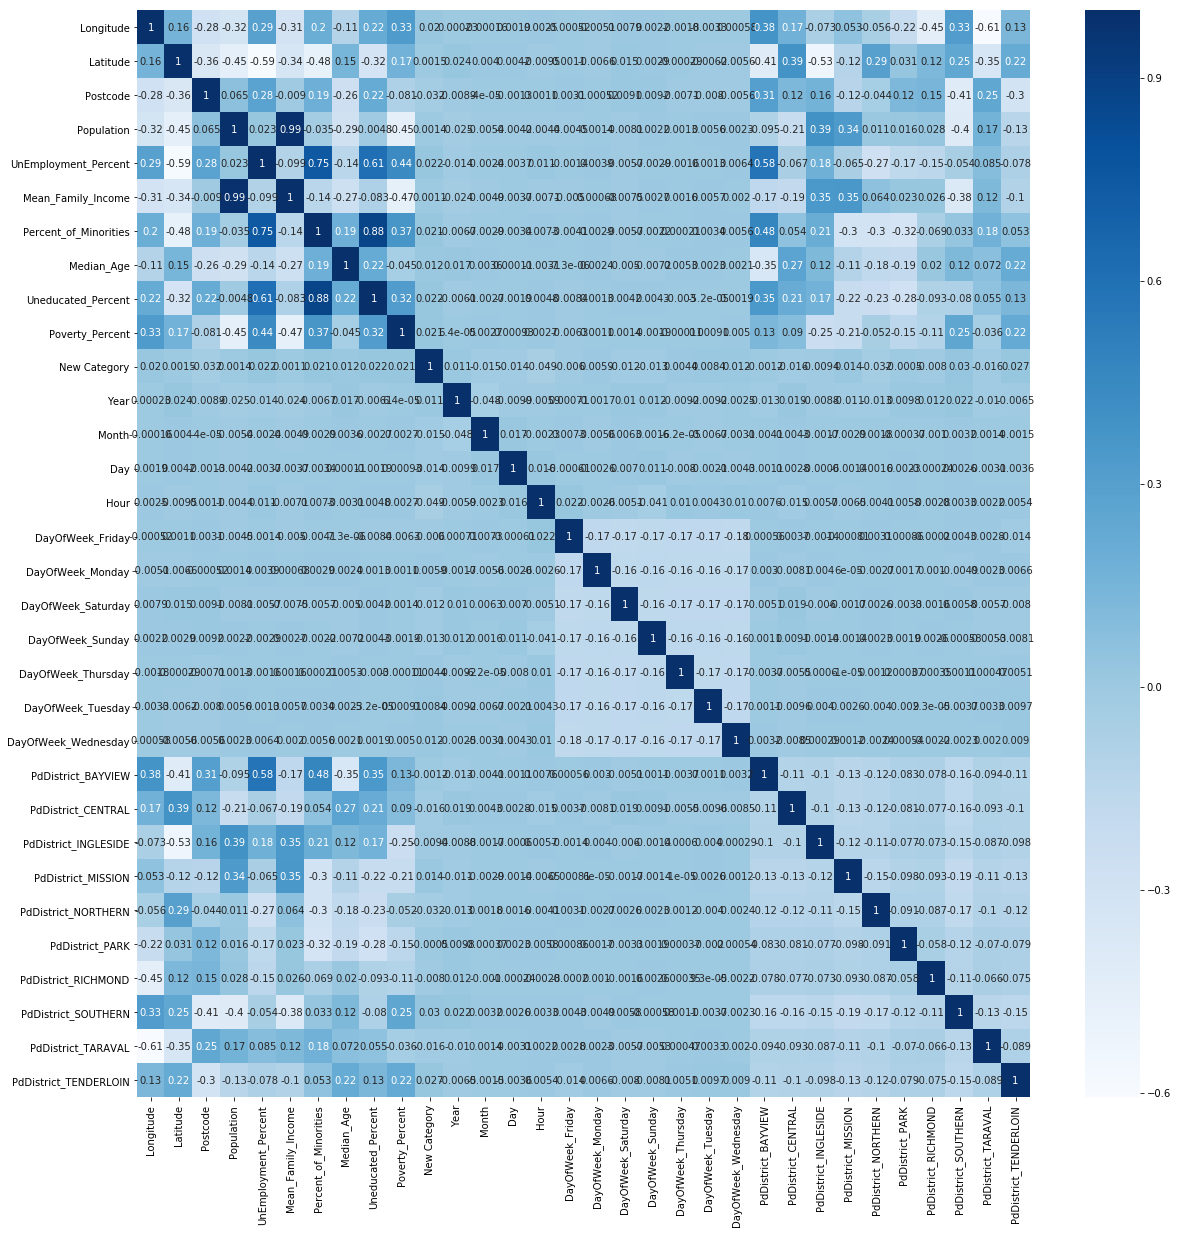

In [41]:
#Feature Selection
#Using Pearson Correlation

plt.figure(figsize=(20,20))
cor = new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [42]:
#Correlation with output variable
cor_target = abs(cor["New Category"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

Longitude                0.020205
Postcode                 0.031874
UnEmployment_Percent     0.022131
Percent_of_Minorities    0.021052
Median_Age               0.012420
Uneducated_Percent       0.021879
Poverty_Percent          0.021031
New Category             1.000000
Year                     0.010766
Month                    0.014705
Day                      0.014229
Hour                     0.048741
DayOfWeek_Saturday       0.011801
DayOfWeek_Sunday         0.013326
DayOfWeek_Wednesday      0.012177
PdDistrict_CENTRAL       0.015985
PdDistrict_MISSION       0.014146
PdDistrict_NORTHERN      0.031630
PdDistrict_SOUTHERN      0.030074
PdDistrict_TARAVAL       0.016317
PdDistrict_TENDERLOIN    0.026594
Name: New Category, dtype: float64

In [55]:
#Traiing and Testing data
new1=pd.DataFrame(new, columns=["Longitude","Postcode","UnEmployment_Percent","Percent_of_Minorities","Median_Age","Uneducated_Percent","Poverty_Percent","New Category","Year","Month","Day","Hour","DayOfWeek_Saturday","DayOfWeek_Sunday","DayOfWeek_Wednesday","PdDistrict_CENTRAL","PdDistrict_MISSION","PdDistrict_NORTHERN","PdDistrict_SOUTHERN","PdDistrict_TARAVAL","PdDistrict_TENDERLOIN"])

In [56]:
new1.head()

,Longitude,Postcode,UnEmployment_Percent,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,New Category,Year,Month,...,Hour,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Wednesday,PdDistrict_CENTRAL,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.364937,94130,13.304185,62.629432,26.1,1.748252,39.021074,0,2004,11,...,12,0,0,0,0,0,0,1,0,0
1,-122.364937,94130,13.304185,62.629432,26.1,1.748252,39.021074,0,2004,10,...,9,0,0,0,0,0,0,1,0,0
2,-122.364937,94130,13.304185,62.629432,26.1,1.748252,39.021074,1,2004,10,...,18,0,0,0,0,0,0,1,0,0
3,-122.364937,94130,13.304185,62.629432,26.1,1.748252,39.021074,1,2004,10,...,8,0,0,0,0,0,0,1,0,0
4,-122.364937,94130,13.304185,62.629432,26.1,1.748252,39.021074,1,2004,10,...,10,0,0,0,0,0,0,1,0,0


In [45]:
train2 = new.copy()
train2.head()

,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
1,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
2,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
3,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
4,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0


In [57]:
for i in new1:
    print(i)

Longitude
Postcode
UnEmployment_Percent
Percent_of_Minorities
Median_Age
Uneducated_Percent
Poverty_Percent
New Category
Year
Month
Day
Hour
DayOfWeek_Saturday
DayOfWeek_Sunday
DayOfWeek_Wednesday
PdDistrict_CENTRAL
PdDistrict_MISSION
PdDistrict_NORTHERN
PdDistrict_SOUTHERN
PdDistrict_TARAVAL
PdDistrict_TENDERLOIN


In [58]:
y=new1.iloc[:,7]

In [59]:
type(y)

pandas.core.series.Series

In [60]:
y.shape

(897892,)

In [61]:
x=new1.drop('New Category', axis=1, inplace=True)

In [63]:
x=new1.copy()
x.head()

,Longitude,Postcode,UnEmployment_Percent,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,Year,Month,Day,Hour,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Wednesday,PdDistrict_CENTRAL,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.364937,94130,13.304185,62.629432,26.1,1.748252,39.021074,2004,11,8,12,0,0,0,0,0,0,1,0,0
1,-122.364937,94130,13.304185,62.629432,26.1,1.748252,39.021074,2004,10,28,9,0,0,0,0,0,0,1,0,0
2,-122.364937,94130,13.304185,62.629432,26.1,1.748252,39.021074,2004,10,25,18,0,0,0,0,0,0,1,0,0
3,-122.364937,94130,13.304185,62.629432,26.1,1.748252,39.021074,2004,10,25,8,0,0,0,0,0,0,1,0,0
4,-122.364937,94130,13.304185,62.629432,26.1,1.748252,39.021074,2004,10,15,10,0,0,0,0,0,0,1,0,0


In [64]:
type(x)

pandas.core.frame.DataFrame

In [65]:
from sklearn.model_selection import train_test_split
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [66]:
type(x_test)

pandas.core.frame.DataFrame

# Random Forest 

In [67]:
# Random Forest Classifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

clf_A = RandomForestClassifier(max_depth=13, n_estimators=200)
clf_A.fit(x_train, y_train)
clf_probs = clf_A.predict_proba(x_test)
score = log_loss(y_test, clf_probs)
score

0.6201324911229902

Accuracy of Random Forest classifier on test set: 0.67

Confusion Matrix is :
 [[149034    702]
 [ 73572   1165]]

 Printing Confusion Matrix



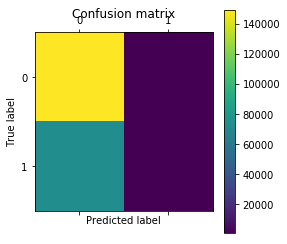

Classification Report is:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80    149736
           1       0.62      0.02      0.03     74737

   micro avg       0.67      0.67      0.67    224473
   macro avg       0.65      0.51      0.42    224473
weighted avg       0.65      0.67      0.54    224473



In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred = clf_A.predict(x_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf_A.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [69]:
# Random Forest Classifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

clf_A = RandomForestClassifier(max_depth=20, n_estimators=200)
clf_A.fit(x_train, y_train)
clf_probs = clf_A.predict_proba(x_test)
score = log_loss(y_test, clf_probs)
score

0.618414691925737

Accuracy of Random Forest classifier on test set: 0.67

Confusion Matrix is :
 [[142354   7382]
 [ 66647   8090]]

 Printing Confusion Matrix



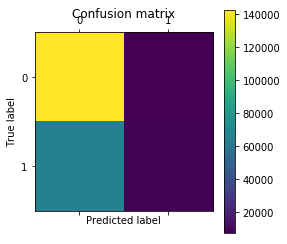

Classification Report is:
               precision    recall  f1-score   support

           0       0.68      0.95      0.79    149736
           1       0.52      0.11      0.18     74737

   micro avg       0.67      0.67      0.67    224473
   macro avg       0.60      0.53      0.49    224473
weighted avg       0.63      0.67      0.59    224473



In [71]:
y_pred = clf_A.predict(x_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf_A.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# Naive Bayes

In [72]:
# Naive-Bayes
from sklearn.naive_bayes import BernoulliNB
clf_D = BernoulliNB()
clf_D.fit(x_train,y_train)
clf_probs_nb = clf_D.predict_proba(x_test)
score = log_loss(y_test, clf_probs_nb)
score

0.6338998648275206

Accuracy of Bayesian classifier on test set: 0.67

Confusion Matrix is :
 [[149736      0]
 [ 74737      0]]

 Printing Confusion Matrix



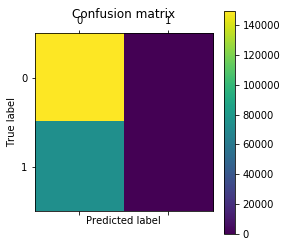

Classification Report is:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80    149736
           1       0.00      0.00      0.00     74737

   micro avg       0.67      0.67      0.67    224473
   macro avg       0.33      0.50      0.40    224473
weighted avg       0.44      0.67      0.53    224473



c:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
y_pred = clf_D.predict(x_test)
print('Accuracy of Bayesian classifier on test set: {:.2f}'.format(clf_D.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# KNN

In [94]:
#KNN
import time
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
clf_knn = KNeighborsClassifier()
clf_knn.fit(x_train, y_train)
y_pred_knn = clf_knn.predict(x_test)
log_loss_knn = log_loss(y_test, y_pred_knn)
print ("nearest neighbors log_loss: ",log_loss_knn)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

nearest neighbors log_loss:  13.215359976401205
--- Time taken is 96.98791527748108 seconds ---


# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
clf_DecisTr = DecisionTreeClassifier()
clf_DecisTr.fit(x_train, y_train)
y_pred_DecisTr = clf_DecisTr.predict(x_test)
log_loss_DecisTr = log_loss(y_test, y_pred_DecisTr)
print ("Decision Tree log_loss: ",log_loss_DecisTr)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

Decision Tree log_loss:  13.478350306210704
--- Time taken is 5.569164276123047 seconds ---


Accuracy of Decision Tree classifier on test set: 0.61

Confusion Matrix is :
 [[109050  40686]
 [ 46911  27826]]

 Printing Confusion Matrix



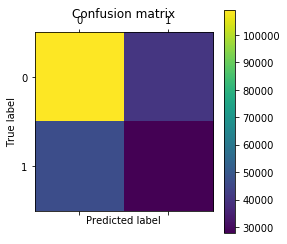

Classification Report is:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71    149736
           1       0.41      0.37      0.39     74737

   micro avg       0.61      0.61      0.61    224473
   macro avg       0.55      0.55      0.55    224473
weighted avg       0.60      0.61      0.61    224473



In [77]:
y_pred = clf_DecisTr.predict(x_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_DecisTr.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# Logistic Regression

In [78]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
start_time = time.time()
clf_B = LogisticRegression(C=.001)
clf_B.fit(x_train,y_train)
clf_probs_logit = clf_B.predict_proba(x_test)
score = log_loss(y_test, clf_probs_logit)
print ("Logistic Regression log_loss: ",score)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

c:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression log_loss:  0.6362448241277642
--- Time taken is 1.3815460205078125 seconds ---


Accuracy of Decision Tree classifier on test set: 0.67

Confusion Matrix is :
 [[149736      0]
 [ 74737      0]]

 Printing Confusion Matrix



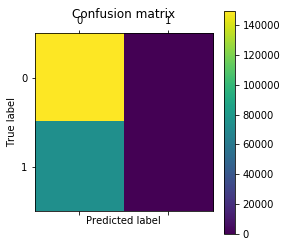

Classification Report is:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80    149736
           1       0.00      0.00      0.00     74737

   micro avg       0.67      0.67      0.67    224473
   macro avg       0.33      0.50      0.40    224473
weighted avg       0.44      0.67      0.53    224473



c:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
y_pred = clf_B.predict(x_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_B.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# SVM

In [80]:
from sklearn.svm import LinearSVC
start_time = time.time()
clf_svm = LinearSVC()
clf_svm.fit(x_train,y_train)
y_pred_svm = clf_svm.predict(x_test)
log_loss_svm = log_loss(y_test, y_pred_svm)
print ('Linear SVM log_loss:', log_loss_svm)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

Linear SVM log_loss: 11.499487828943524
--- Time taken is 198.07687544822693 seconds ---


c:\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy of Decision Tree classifier on test set: 0.67

Confusion Matrix is :
 [[149736      0]
 [ 74737      0]]

 Printing Confusion Matrix



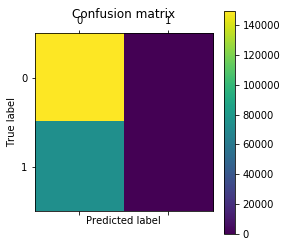

Classification Report is:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80    149736
           1       0.00      0.00      0.00     74737

   micro avg       0.67      0.67      0.67    224473
   macro avg       0.33      0.50      0.40    224473
weighted avg       0.44      0.67      0.53    224473



c:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [81]:
y_pred = clf_svm.predict(x_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_svm.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# Deep Neural Network

In [82]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)

In [83]:
train2.head()

,Longitude,Latitude,Postcode,Population,UnEmployment_Percent,Mean_Family_Income,Percent_of_Minorities,Median_Age,Uneducated_Percent,Poverty_Percent,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
1,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
2,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
3,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0
4,-122.364937,37.810204,94130,3187.0,13.304185,1716.0,62.629432,26.1,1.748252,39.021074,...,0,0,0,0,0,0,0,1,0,0


In [85]:
x,y = to_xy(train2,"New Category")

In [86]:
x1,x2,y1,y2=train_test_split(x,y)

In [87]:
x1

array([[-1.22413567e+02,  3.77795143e+01,  9.41020000e+04, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.22394051e+02,  3.77461662e+01,  9.41240000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.22412415e+02,  3.77830048e+01,  9.41020000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [-1.22424736e+02,  3.78022804e+01,  9.41230000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.22385132e+02,  3.77383347e+01,  9.41240000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.22481201e+02,  3.77276459e+01,  9.41320000e+04, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]], dtype=float32)

In [88]:
y1

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [89]:
x2

array([[-1.22475220e+02,  3.77210579e+01,  9.41320000e+04, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.22409256e+02,  3.77882385e+01,  9.41020000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.22418030e+02,  3.77898827e+01,  9.41090000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.22389862e+02,  3.77375870e+01,  9.41240000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.22399132e+02,  3.77145309e+01,  9.41340000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.22430084e+02,  3.77459564e+01,  9.41310000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]], dtype=float32)

In [90]:
y2

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\saipo\Desktop\CSC215\finalproject\wts1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)

    # Build network
    model = Sequential()
    model.add(Dense(512, input_dim=x1.shape[1], activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(y1.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

    model.fit(x1,y1,validation_data=(x2,y2),callbacks=[monitor,checkpointer],verbose=2,epochs=10)


print('Training finished...Loading the best model')  
print()


In [ ]:
model.load_weights(r"C:\Users\saipo\Desktop\CSC215\finalproject\wts1.hdf5") # load weights from best model

# Measure accuracy
pred = model.predict(x2)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y2,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))